In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

 


In [3]:
# 

In [4]:
df=pd.read_csv("Bengaluru_House_Data.csv")
print(df.head())

              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  


In [5]:
df = df.dropna()
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

# Convert 'total_sqft' to number
def convert_sqft(x):
    try:
        return float(x)
    except:
        tokens = x.split('-')
        if len(tokens) == 2:
            return (float(tokens[0]) + float(tokens[1])) / 2
        return None

df['total_sqft'] = df['total_sqft'].apply(convert_sqft)

# Drop rows where sqft couldn't be converted
df = df.dropna(subset=['total_sqft'])

In [6]:
# 

In [7]:
df_model = df[['total_sqft', 'bath', 'bhk', 'price']]


In [8]:
X = df_model.drop('price', axis=1)
y = df_model['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


In [9]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [10]:
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 Score: 0.5453709114015363
MSE: 5786.928870150211


In [11]:
# Example: 1500 sqft, 2 bathrooms, 3 BHK
price = model.predict([[1500, 2, 3]])
print("Predicted Price in Lakhs:", price[0])


Predicted Price in Lakhs: 79.63217375984847


c:\Users\FTT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [12]:
comparison = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_pred
})

print(comparison.head(10))  # Show first 10 rows


   Actual Price  Predicted Price
0         51.04       117.984796
1         77.00        69.828506
2        650.00       380.027139
3         59.00       102.490604
4         86.00       117.144914
5         39.77        54.197360
6        110.00        68.895304
7         16.45        -3.290957
8         74.00        70.341768
9         59.47        62.362884


<!--  -->

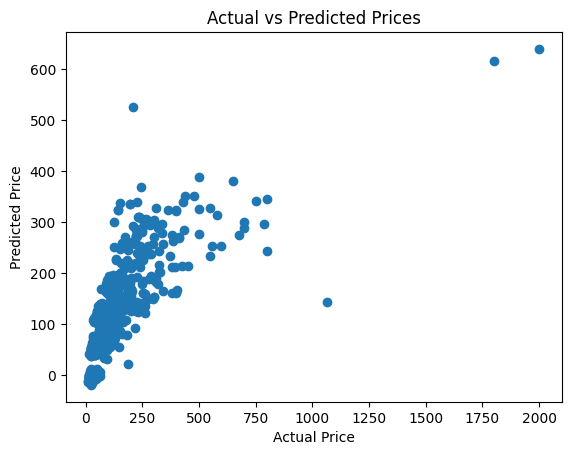

In [13]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()


In [14]:
# 

In [15]:
# 